## Original tutorial : https://www.pycaret.org/tutorials/html/CLF101.html
## Other examples (Regression, Clustering, NLP, Anomaly detection, etc) : https://bit.ly/3vAWged 

<br>
<br>

## 0. 필수 라이브러리 설치

<br>
<br>

In [ ]:
# (주의) pycaret / sklearn / scipy 외에 추가적으로 다른 라이브러리를 설치하실 경우 (sklearn & scipy 의 버전을 아래 코드들로 덮어써줄 수 있도록) 이 셀에서 먼저 설치해주세요 

# !pip install ~~~

In [1]:
!pip install pycaret==2.3.10

In [2]:
pip install jinja2==3.1.2

In [3]:
pip install xgboost==1.6.0

In [ ]:
# # (Backup)

# !pip install pyyaml==5.4.1
# !pip install pycaret==2.1.2
# !pip install scikit-learn==0.23 # 반드시 Scikit-learn 버전을 맞춰줘야 합니다!
# !pip install scipy==1.5.3 # 반드시 Scipy 버전을 맞춰줘야 합니다! 

<hr>
<br>
<br>

<h2 style="color:red;"><b>[ 런타임 ] - [런타임 다시시작 ] 을 먼저 해주시고 다음 cell로 내려가주세요.</b></h2>

<br>
<br>
<hr>

<br>
<br>

## 1. tf.keras를 활용한 인공신경망 기반 분류

<br>
<br>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving titanic_modified.csv to titanic_modified.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing


titanic_df = pd.read_csv("titanic_modified.csv")

titanic_target = titanic_df[['Survived']].copy()
titanic_data = titanic_df.copy()

del titanic_data['Survived']


train_data, test_data, train_label, test_label = model_selection.train_test_split(titanic_data, titanic_target,
                                                                                 test_size=0.3,
                                                                                 random_state=0)

enc = preprocessing.OneHotEncoder(categories='auto') 

train_label = enc.fit_transform(train_label).toarray()
test_label = enc.fit_transform(test_label).toarray()


import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

model = models.Sequential() 

model.add(layers.Dense(input_dim=8, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) # elu or relu

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=2, activation='softmax')) # One-hot vector for 0 & 1


model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 


history = model.fit(train_data, train_label, batch_size=100, epochs=20, validation_split=0.3, verbose=0) 
result = model.evaluate(test_data, test_label)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

9/9 [==============================] - 0s 5ms/step - loss: 0.4880 - categorical_accuracy: 0.8134
loss (cross-entropy) : 0.48798438906669617
test accuracy : 0.8134328126907349


<br>
<br>

## 2. PyCaret을 활용한 low-code machine learning

<br>
<br>

In [5]:
from pycaret.classification import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [6]:
titanic_df = pd.read_csv("titanic_modified.csv")

model = setup(data=titanic_df, 
              target='Survived', 
              train_size=0.7, # default value
              session_id=9) # Random seed 

# 11	Transformed Train Set	(623, 18) : Training data (70% 할당됨)
# 12	Transformed Test Set	(268, 18) : Test data (30% 할당됨)

,Description,Value
0,session_id,9
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 9)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


<br>
<br>

### 2-1. 직접 모델 종류를 지정하여 생성할 수도 있음

In [7]:
xgb = create_model('xgboost') # creates a model and scores it using stratified cross validation (가능한 모델estimator 리스트는 docstring 참고)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9206,0.9482,0.8333,0.9524,0.8889,0.8276,0.8321
1,0.7460,0.7853,0.5417,0.7222,0.6190,0.4343,0.4445
2,0.8254,0.8718,0.7083,0.8095,0.7556,0.6207,0.6240
3,0.7742,0.8411,0.6087,0.7368,0.6667,0.4983,0.5035
4,0.8387,0.8255,0.6957,0.8421,0.7619,0.6416,0.6483
5,0.8226,0.8423,0.6957,0.8000,0.7442,0.6094,0.6129
6,0.7742,0.8317,0.5217,0.8000,0.6316,0.4790,0.5017
7,0.8387,0.8706,0.7083,0.8500,0.7727,0.6493,0.6558
8,0.8387,0.8936,0.6667,0.8889,0.7619,0.6437,0.6589


In [8]:
xgb_tuned = tune_model(xgb, optimize='Accuracy') # tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5397,0.9589,1.0000,0.4528,0.6234,0.2081,0.3407
1,0.5714,0.7970,0.8750,0.4667,0.6087,0.2222,0.2791
2,0.6032,0.8814,1.0000,0.4898,0.6575,0.2991,0.4193
3,0.5161,0.8055,0.9565,0.4314,0.5946,0.1704,0.2693
4,0.5323,0.8300,0.9565,0.4400,0.6027,0.1923,0.2917
5,0.5161,0.8545,0.9565,0.4314,0.5946,0.1704,0.2693
6,0.5806,0.8428,0.9565,0.4681,0.6286,0.2599,0.3559
7,0.6129,0.8673,0.9583,0.5000,0.6571,0.3021,0.3930
8,0.5484,0.8876,0.9583,0.4600,0.6216,0.2066,0.3055


<br>
<br>

### 2-2. 자동으로 여러가지 모델에 대한 성능 비교가 가능

In [ ]:
# # 아래 cell 에서 compare_models 함수 실행 시, 
# # 활용하는 데이터의 상태에 따라 [ AttributeError: 'str' object has no attribute 'decode' ] 에러가 발생할 수 있습니다.
# # 이 경우에는 아래 코드를 대신 실행하여 비교 대상이 되는 모델 리스트에서 Logistic Regression 모델을 제외시켜주시기 바랍니다.

# top_3_models = compare_models(exclude=['lr'], 
#                               sort='Accuracy', # Other options are 'AUC', 'Recall', 'Precision', 'F1', 'Kappa' and 'MCC'
#                               n_select = 3) # Select top n models 

In [9]:
top_3_models = compare_models(sort='Accuracy', # Other options are 'AUC', 'Recall', 'Precision', 'F1', 'Kappa' and 'MCC'
                              n_select = 3) # Select top n models 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8443,0.8766,0.7025,0.8644,0.7713,0.6556,0.6671,0.057
ridge,Ridge Classifier,0.8442,0.0000,0.7534,0.8230,0.7848,0.6632,0.6666,0.011
lda,Linear Discriminant Analysis,0.8426,0.8775,0.7534,0.8198,0.7832,0.6601,0.6636,0.012
lr,Logistic Regression,0.8394,0.8794,0.7618,0.8065,0.7817,0.6548,0.6575,0.022
gbc,Gradient Boosting Classifier,0.8394,0.8803,0.6895,0.8592,0.7614,0.6433,0.6546,0.069
knn,K Neighbors Classifier,0.8362,0.8465,0.6940,0.8538,0.7602,0.6383,0.6508,0.114
rf,Random Forest Classifier,0.8330,0.8685,0.6893,0.8410,0.7528,0.6297,0.6400,0.448
dt,Decision Tree Classifier,0.8283,0.8328,0.6607,0.8556,0.7432,0.6177,0.6311,0.012
ada,Ada Boost Classifier,0.8250,0.8679,0.7364,0.7911,0.7602,0.6229,0.6266,0.075
et,Extra Trees Classifier,0.8250,0.8486,0.6520,0.8514,0.7364,0.6094,0.6230,0.435


<br>
<br>

### 2-3. 선택된 모델 중 원하는 모델을 index 번호로 꺼내어 바로 활용할 수 있음

In [10]:
top_3_models

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=9, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=9, solver='auto',
                 tol=0.001),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001)]

In [11]:
evaluate_model(top_3_models[0]) # 설정된 Hyper-params의 값, AUC/Confusion matrix 등 성능 지표, Feature importance 등을 바로 확인할 수 있음

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

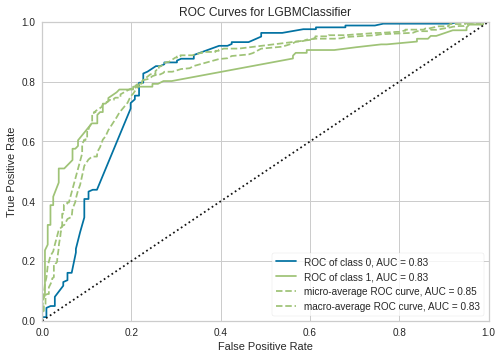

In [12]:
# evaluate_model로 얻어지는 plot을 직접 지정하여 별도로 출력할 수 있음

model_top = top_3_models[0]

plot_model(model_top, plot = 'auc')
# plot_model(model_top, plot = 'pr')
# plot_model(model_top, plot='feature')
# plot_model(model_top, plot = 'confusion_matrix')

In [13]:
predict_model(top_3_models[0]) # 미리 제외시켜두었던 test data에 대한 예측 결과값

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7873,0.8287,0.5755,0.8356,0.6816,0.5299,0.5507


,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5,isAlone_1,Survived,Label,Score
0,2.0,0.0,0.4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.6900
1,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.9348
2,2.0,0.0,0.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9636
3,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.8078
4,2.0,0.0,0.4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.6900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.9311
264,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.9615
265,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.8681
266,1.0,0.0,1.6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9084


<br>
<br>

### 2-4. 선택한 모델을 바탕으로 blending이 가능

examples for Bagging / Boosting / Blending / Stacking : 
https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb

In [14]:
blended = blend_models(estimator_list=top_3_models, 
                       fold=10, # default
                       optimize='Accuracy',
                       method = 'hard')

# method 'hard' : uses predicted class labels for majority rule voting.
# method 'soft' : predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9206,0.0,0.8333,0.9524,0.8889,0.8276,0.8321
1,0.8254,0.0,0.7500,0.7826,0.7660,0.6268,0.6272
2,0.8413,0.0,0.7917,0.7917,0.7917,0.6635,0.6635
3,0.8226,0.0,0.6957,0.8000,0.7442,0.6094,0.6129
4,0.8065,0.0,0.7391,0.7391,0.7391,0.5853,0.5853
5,0.8226,0.0,0.7391,0.7727,0.7556,0.6164,0.6168
6,0.8226,0.0,0.6522,0.8333,0.7317,0.6021,0.6122
7,0.8710,0.0,0.7500,0.9000,0.8182,0.7195,0.7266
8,0.8387,0.0,0.7083,0.8500,0.7727,0.6493,0.6558


In [15]:
predict_model(blended) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8022,0.7826,0.6887,0.7849,0.7337,0.5775,0.5806


,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5,isAlone_1,Survived,Label
0,2.0,0.0,0.4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
1,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
2,2.0,0.0,0.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
3,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
4,2.0,0.0,0.4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
264,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
265,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
266,1.0,0.0,1.6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0


In [16]:
# finalize_model() 
# - fits the model onto the complete dataset including the test/hold-out sample (30% in this case). 
# - The purpose of this function is to train the model on the complete dataset before it is deployed in production.

final_blended = finalize_model(blended)
print(final_blended)

VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=9, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',
                                             su...
                             ('ridge',
                   

In [17]:
predict_model(final_blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8097,0.792,0.7075,0.7895,0.7463,0.5948,0.597


,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5,isAlone_1,Survived,Label
0,2.0,0.0,0.4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
1,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
2,2.0,0.0,0.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
3,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
4,2.0,0.0,0.4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
264,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
265,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0
266,1.0,0.0,1.6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0


In [18]:
# Predict on unseen data 1)

# data_unseen = ? # unseen data as pd.DataFrame (without labels)
# unseen_predictions = predict_model(final_blended, data=data_unseen)
# unseen_predictions

titanic_df = pd.read_csv("titanic_modified.csv")
holdout_data = titanic_df.sample(frac=0.10, random_state=0).reset_index(drop=True)

unseen_predictions = predict_model(final_blended, data=holdout_data)
unseen_predictions # unseen_predictions['Label'].values


# Predict on unseen data 2) 

# data_unseen = ? # unseen data as pd.DataFrame (without labels)
# pipeline = get_config('prep_pipe') # Scikit-learn's Pipeline object
# data_unseen = pipeline.transform(data_unseen)
# unseen_predictions = final_blended.predict(data_unseen)
# unseen_predictions

# titanic_df = pd.read_csv("titanic_modified.csv")
# holdout_data = titanic_df.sample(frac=0.10, random_state=0).reset_index(drop=True)
# pipeline = get_config('prep_pipe') # Scikit-learn's Pipeline object
# holdout_processed = pipeline.transform(holdout_data)

# unseen_predictions = final_blended.predict(holdout_processed)
# unseen_predictions 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8539,0.8418,0.7436,0.9062,0.8169,0.6974,0.7068


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,isAlone,Label
0,0,3,0,1.0,0.0,2,3,0.0,1,0
1,0,3,0,1.0,0.0,0,3,0.0,1,0
2,0,3,0,0.0,0.0,1,1,2.0,0,0
3,1,1,1,2.0,1.0,2,4,0.4,0,1
4,1,3,1,1.0,0.0,2,4,0.8,0,1
...,...,...,...,...,...,...,...,...,...,...
84,0,2,0,2.0,0.0,0,3,0.0,1,0
85,1,1,1,1.0,0.0,0,2,0.0,1,1
86,1,1,1,2.0,2.0,2,2,0.0,1,1
87,1,3,1,3.0,0.0,0,4,0.0,1,1


<br>
<br>

### 2-5. 모델 저장 & 불러오기

In [ ]:
save_model(final_blended, 'final_blended')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                                RidgeClassifier(alpha=1.0,
                                                                class_weight=None,
                                                                copy_X=True,
                                       

In [ ]:
!ls

final_blended.pkl  logs.log  sample_data  titanic_modified.csv


In [ ]:
files.download('final_blended.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loaded_model = load_model('final_blended')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# Predict on unseen data 1)

# data_unseen = ? # unseen data as pd.DataFrame (without labels)
# unseen_predictions = predict_model(final_blended, data=data_unseen)
# unseen_predictions

titanic_df = pd.read_csv("titanic_modified.csv")
holdout_data = titanic_df.sample(frac=0.10, random_state=0).reset_index(drop=True)

unseen_predictions = predict_model(final_blended, data=holdout_data)
unseen_predictions # unseen_predictions['Label'].values


# Predict on unseen data 2) 

# data_unseen = ? # unseen data as pd.DataFrame (without labels)
# pipeline = get_config('prep_pipe') # Scikit-learn's Pipeline object
# data_unseen = pipeline.transform(data_unseen)
# unseen_predictions = final_blended.predict(data_unseen)
# unseen_predictions

# titanic_df = pd.read_csv("titanic_modified.csv")
# holdout_data = titanic_df.sample(frac=0.10, random_state=0).reset_index(drop=True)
# pipeline = get_config('prep_pipe') # Scikit-learn's Pipeline object
# holdout_processed = pipeline.transform(holdout_data)

# unseen_predictions = final_blended.predict(holdout_processed)
# unseen_predictions 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8539,0.8418,0.7436,0.9062,0.8169,0.6974,0.7068


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,isAlone,Label
0,0,3,0,1.0,0.0,2,3,0.0,1,0
1,0,3,0,1.0,0.0,0,3,0.0,1,0
2,0,3,0,0.0,0.0,1,1,2.0,0,0
3,1,1,1,2.0,1.0,2,4,0.4,0,1
4,1,3,1,1.0,0.0,2,4,0.8,0,1
...,...,...,...,...,...,...,...,...,...,...
84,0,2,0,2.0,0.0,0,3,0.0,1,0
85,1,1,1,1.0,0.0,0,2,0.0,1,1
86,1,1,1,2.0,2.0,2,2,0.0,1,1
87,1,3,1,3.0,0.0,0,4,0.0,1,1


<br>

\+ 
<br>
Binary Classification Tutorial (CLF102) - Level Intermediate @ https://j.mp/2T6i79m
<br>
Binary Classification Tutorial (CLF103) - Level Expert @ https://j.mp/3k8Kpw5